In [1]:
import os, warnings, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
dataset =pd.read_csv('./data/CICEVSE2024.csv')
data = dataset.copy()
data

C:\Users\MALIKA\AppData\Local\Temp\ipykernel_15244\4131189187.py:1: DtypeWarning: Columns (81,82,83,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset =pd.read_csv('./data/CICEVSE2024.csv')


,id,expiration_id,src_ip,src_mac,src_oui,src_port,dst_ip,dst_mac,dst_oui,dst_port,...,application_name,application_category_name,application_is_guessed,application_confidence,requested_server_name,client_fingerprint,server_fingerprint,user_agent,content_type,label_mul
0,0,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,42750,192.168.137.226,0c:8b:95:09:c6:08,0c:8b:95,256,...,Unknown,Unspecified,0,0,NaN,NaN,NaN,NaN,NaN,charging Aggressive scan
1,1,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,42750,192.168.137.226,0c:8b:95:09:c6:08,0c:8b:95,993,...,IMAPS,Email,1,1,NaN,NaN,NaN,NaN,NaN,charging Aggressive scan
2,2,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,42750,192.168.137.226,0c:8b:95:09:c6:08,0c:8b:95,139,...,NetBIOS,System,1,1,NaN,NaN,NaN,NaN,NaN,charging Aggressive scan
3,3,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,42750,192.168.137.226,0c:8b:95:09:c6:08,0c:8b:95,143,...,IMAP,Email,1,1,NaN,NaN,NaN,NaN,NaN,charging Aggressive scan
4,4,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,42750,192.168.137.226,0c:8b:95:09:c6:08,0c:8b:95,135,...,RPC,RPC,1,1,NaN,NaN,NaN,NaN,NaN,charging Aggressive scan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744695,57053,0,192.168.10.4,dc:a6:32:c9:e6:9f,dc:a6:32,56979,192.168.10.2,dc:a6:32:c9:e5:5e,dc:a6:32,7938,...,Unknown,Unspecified,0,0,NaN,NaN,NaN,NaN,NaN,MaliciousEV vulnerability scan
2744696,57054,0,192.168.10.4,dc:a6:32:c9:e6:9f,dc:a6:32,56979,192.168.10.2,dc:a6:32:c9:e5:5e,dc:a6:32,6543,...,Unknown,Unspecified,0,0,NaN,NaN,NaN,NaN,NaN,MaliciousEV vulnerability scan
2744697,57055,0,192.168.10.4,dc:a6:32:c9:e6:9f,dc:a6:32,56979,192.168.10.2,dc:a6:32:c9:e5:5e,dc:a6:32,8000,...,Unknown,Unspecified,0,0,NaN,NaN,NaN,NaN,NaN,MaliciousEV vulnerability scan
2744698,57056,0,192.168.10.4,dc:a6:32:c9:e6:9f,dc:a6:32,56979,192.168.10.2,dc:a6:32:c9:e5:5e,dc:a6:32,5226,...,Unknown,Unspecified,0,0,NaN,NaN,NaN,NaN,NaN,MaliciousEV vulnerability scan


In [3]:
data.columns

Index(['id', 'expiration_id', 'src_ip', 'src_mac', 'src_oui', 'src_port',
       'dst_ip', 'dst_mac', 'dst_oui', 'dst_port', 'protocol', 'ip_version',
       'vlan_id', 'tunnel_id', 'bidirectional_first_seen_ms',
       'bidirectional_last_seen_ms', 'bidirectional_duration_ms',
       'bidirectional_packets', 'bidirectional_bytes', 'src2dst_first_seen_ms',
       'src2dst_last_seen_ms', 'src2dst_duration_ms', 'src2dst_packets',
       'src2dst_bytes', 'dst2src_first_seen_ms', 'dst2src_last_seen_ms',
       'dst2src_duration_ms', 'dst2src_packets', 'dst2src_bytes',
       'bidirectional_min_ps', 'bidirectional_mean_ps',
       'bidirectional_stddev_ps', 'bidirectional_max_ps', 'src2dst_min_ps',
       'src2dst_mean_ps', 'src2dst_stddev_ps', 'src2dst_max_ps',
       'dst2src_min_ps', 'dst2src_mean_ps', 'dst2src_stddev_ps',
       'dst2src_max_ps', 'bidirectional_min_piat_ms',
       'bidirectional_mean_piat_ms', 'bidirectional_stddev_piat_ms',
       'bidirectional_max_piat_ms', 'src2dst

In [4]:
data.head()

,id,expiration_id,src_ip,src_mac,src_oui,src_port,dst_ip,dst_mac,dst_oui,dst_port,...,application_name,application_category_name,application_is_guessed,application_confidence,requested_server_name,client_fingerprint,server_fingerprint,user_agent,content_type,Attack Type
0,0,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,42750,192.168.137.226,0c:8b:95:09:c6:08,0c:8b:95,256,...,Unknown,Unspecified,0,0,NaN,NaN,NaN,NaN,NaN,Aggressive Scan
1,1,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,42750,192.168.137.226,0c:8b:95:09:c6:08,0c:8b:95,993,...,IMAPS,Email,1,1,NaN,NaN,NaN,NaN,NaN,Aggressive Scan
2,2,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,42750,192.168.137.226,0c:8b:95:09:c6:08,0c:8b:95,139,...,NetBIOS,System,1,1,NaN,NaN,NaN,NaN,NaN,Aggressive Scan
3,3,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,42750,192.168.137.226,0c:8b:95:09:c6:08,0c:8b:95,143,...,IMAP,Email,1,1,NaN,NaN,NaN,NaN,NaN,Aggressive Scan
4,4,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,42750,192.168.137.226,0c:8b:95:09:c6:08,0c:8b:95,135,...,RPC,RPC,1,1,NaN,NaN,NaN,NaN,NaN,Aggressive Scan


In [4]:
print("nbr rwos : " ,len(data))
print("nbr feauter: ", len(data.columns))

nbr rwos :  2744700
nbr feauter:  87


In [5]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,2744700.0,53745.608059,49155.071437,0.0,17630.75,40172.0,67344.0,228000.0
expiration_id,2744700.0,0.000025,0.004977,0.0,0.00,0.0,0.0,1.0
src_port,2744700.0,43203.319269,15658.814500,0.0,35607.00,45519.0,55160.0,65535.0
dst_port,2744700.0,5828.036448,11972.515399,0.0,80.00,1091.0,5903.0,65535.0
protocol,2744700.0,6.134726,1.365722,1.0,6.00,6.0,6.0,246.0
...,...,...,...,...,...,...,...,...
dst2src_psh_packets,2744700.0,0.054716,16.885025,0.0,0.00,0.0,0.0,6767.0
dst2src_rst_packets,2744700.0,0.889661,1.274879,0.0,0.00,1.0,1.0,19.0
dst2src_fin_packets,2744700.0,0.000708,0.031823,0.0,0.00,0.0,0.0,7.0
application_is_guessed,2744700.0,0.398496,0.489589,0.0,0.00,0.0,1.0,1.0


In [6]:
data['label_mul'].value_counts()

label_mul
MaliciousEV syn stealth scan       228001
charging syn stealth               222097
charging port scan                 177409
charging service detection scan    165171
MaliciousEV port scan              158013
charging syn flood                 131106
idle tcp flood                     131104
charging push ack flood            131095
idle syn flood                     131090
charging tcp flood                 131090
charging vulnerability scan        119236
MaliciousEV service detection       87089
idle syn stealth scan               80848
idle port scan                      78145
charging os fingerprinting          72735
idle push ack flood                 65559
charging synonymous ip              65548
charging synonymous ip flood        65546
idle synonymous ip flood            65546
idle synonymous ip                  65545
MaliciousEV vulnerability scan      57058
idle vulnerability scan             55073
idle os fingerprinting              49279
idle aggressive scan    

In [7]:
attack_types = data['label_mul'].unique()
print(attack_types)

['charging Aggressive scan' 'Charging Benign' 'charging icmp flood'
 'charging icmp fragmentation' 'charging os fingerprinting'
 'charging portscan' 'charging push ack flood'
 'charging service detection' 'charging slowLoris scan'
 'charging syn flood' 'charging syn stealth' 'charging synonymous ip'
 'charging tcp flood' 'charging udp flood' 'charging vulnerability scan'
 'idle aggressive scan' 'idle benign' 'idle icmp fragmentation'
 'idle os fingerprinting' 'idle portscan' 'idle service detection'
 'idle slowloris scan' 'idle syn flood' 'idle syn stealth scan'
 'idle synonymous ip' 'idle tcp flood' 'idle udp flood'
 'idle vulnerability scan' 'charging aggressive scan' 'charging port scan'
 'charging service detection scan' 'charging synonymous ip flood'
 'idle icmp flood' 'idle port scan' 'idle push ack flood'
 'idle synonymous ip flood' 'MaliciousEV aggressive scan'
 'MaliciousEV os fingerprinting' 'MaliciousEV port scan'
 'MaliciousEV service detection' 'MaliciousEV syn stealth sca

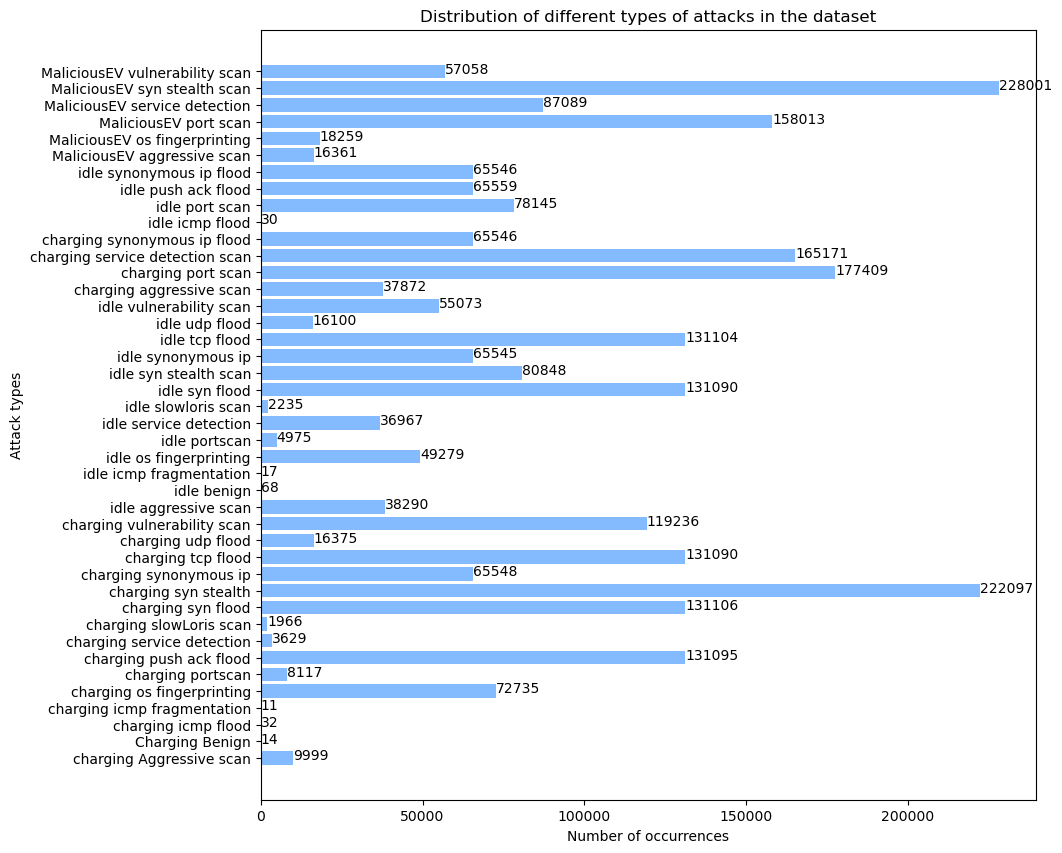

In [ ]:
plt.figure(figsize=(10, 10))

attack = ('charging Aggressive scan' ,'Charging Benign', 'charging icmp flood',
 'charging icmp fragmentation', 'charging os fingerprinting',
 'charging portscan' ,'charging push ack flood',
 'charging service detection' ,'charging slowLoris scan',
 'charging syn flood', 'charging syn stealth', 'charging synonymous ip',
 'charging tcp flood', 'charging udp flood' ,'charging vulnerability scan',
 'idle aggressive scan', 'idle benign' ,'idle icmp fragmentation',
 'idle os fingerprinting', 'idle portscan', 'idle service detection',
 'idle slowloris scan', 'idle syn flood', 'idle syn stealth scan',
 'idle synonymous ip' ,'idle tcp flood', 'idle udp flood',
 'idle vulnerability scan', 'charging aggressive scan', 'charging port scan',
 'charging service detection scan', 'charging synonymous ip flood',
 'idle icmp flood' ,'idle port scan' ,'idle push ack flood',
 'idle synonymous ip flood' ,'MaliciousEV aggressive scan',
 'MaliciousEV os fingerprinting', 'MaliciousEV port scan',
 'MaliciousEV service detection', 'MaliciousEV syn stealth scan',
 'MaliciousEV vulnerability scan')
y_pos = np.arange(len(attack))

amount = data['label_mul'].value_counts().reindex(attack)[0:].values  # Seriyi diziye dönüştürme ve indeksleri yeniden düzenleme

plt.barh(y_pos, amount, align='center', color='#84bbff')
plt.yticks(y_pos, attack)
plt.title('Distribution of different types of attacks in the dataset')
plt.xlabel('Number of occurrences')
plt.ylabel('Attack types')

for i, v in enumerate(amount):
    plt.text(v + 3, i - 0.1, str(v))
#plt.savefig('VisinD.png', dpi=600, bbox_inches='tight')
plt.show()